## Secção 1 - Exploração inicial e pré-processamento

##### 1.1 - Descrever e caracterizar os dados atribuídos de acordo com a documentação/ literatura existente;
##### 1.2 - Descrever sucintamente as características dos dados disponíveis a partir da análise exploratória inicial; 

Os __microRNA (miRNA)__ são pequenos RNA __não codificantes__ que desempenham um papel importante na regulação de processos biológicos como a proliferação e a diferenciação celular, entre outros. Normalmente, funcionam para regular negativamente os alvos genéticos.

A previsão exacta da interação desconhecida entre o miRNA e o alvo pode levar a um conhecimento mais completo do mecanismo da doença e também pode resultar em potenciais biomarcadores do alvo da doença. Podem também ajudar a identificar miRNA hits para candidatos a terapêuticas de miRNA.

___Este trabalho consistirá em prever a atividade de interação entre o miRNA e o alvo genético.___\
___Será um problema de classificação binária. Dada a sequência madura do miRNA e a sequência de aminoácidos do alvo, prever a probabilidade de interação.___

##### 1.3 - Descrever os passos de preparação dos dados e pré-processamento que efetuamos, justificando as escolhas; 

In [ ]:
pip install PyTDC

In [1]:
from tdc.multi_pred import MTI

In [2]:
data = MTI(name = 'miRTarBase')

Found local copy...
Loading...
Done!


A miRTarBase acumula __mais de trezentos e sessenta mil interacções miRNA-alvo__ (MTI), que foram recolhidas através de uma pesquisa manual da literatura pertinente. De um modo geral, as MTI recolhidas são validadas experimentalmente através de ensaios de repórteres, western blot, microarray e experiências de sequenciação de nova geração.\
_Informações do dataset: 400.082 pares MTI, 3.465 miRNAs, 21.242 alvos_

In [3]:
data = data.neg_sample(frac = 1) # O dataset contém apenas pares positivos e para se aceder aos pares negativos temos que efetuar este código

In [4]:
dataset_all=data.get_data()

In [5]:
dataset_all

,miRNA_ID,miRNA,Target_ID,Target,Y
0,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1
1,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1
2,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1
3,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1
4,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1
...,...,...,...,...,...
800159,mmu-miR-455-3p,GCAGUCCACGGGCAUAUACAC,93673,MAAYHIRQYQEKDHKRVLELFSSGMKELIPAAIRQMLTLPHSLLLL...,0
800160,hsa-miR-4446-3p,CAGGGCUGGCAGUGACAUGGGU,51128,MSFIFDWIYSGFSSVLQFLGLYKKTGKLVFLGLDNAGKTTLLHMLK...,0
800161,hsa-miR-3129-5p,GCAGUAGUGUAGAGAUUGGUUU,65083,MGPAPAGEQLRGATGEPEVMEPALEGTGKEGKKASSRKRTLAEPPA...,0
800162,hsa-miR-5582-5p,UAGGCACACUUAAAGUUAUAGC,22648,MSPENLSDCNNSVKDFDQHPELTIRQCVHREKPYKQEECDDSACDQ...,0


In [8]:
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800164 entries, 0 to 800163
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   miRNA_ID   800164 non-null  object
 1   miRNA      800164 non-null  object
 2   Target_ID  800164 non-null  object
 3   Target     800164 non-null  object
 4   Y          800164 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 30.5+ MB


In [ ]:
copy_dataset_all = dataset_all.copy(deep=True)

In [7]:
copy_dataset_all['Comprimento_Target'] = copy_dataset_all['Target'].apply(len)

In [ ]:
plt.boxplot(copy_dataset_all['Comprimento_Target'])

In [ ]:
indices_max_comprimento = copy_dataset_all[copy_dataset_all['Comprimento_Target'] == copy_dataset_all['Comprimento_Target'].max()].index

copy_dataset_all = copy_dataset_all.drop(indices_max_comprimento)

In [73]:
copy_dataset_all=copy_dataset_all.drop('Comprimento_Target', axis=1)

In [11]:
sequences_with_X = copy_dataset_all[copy_dataset_all['Target'].str.contains('X')]

print(len(sequences_with_X['Target']))

45


In [12]:
indexes_with_X = copy_dataset_all[copy_dataset_all['Target'].str.contains('X')].index

copy_dataset_all = copy_dataset_all.drop(indexes_with_X)

copy_dataset_all = copy_dataset_all.reset_index(drop=True)

In [ ]:
copy_dataset_all.shape

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from propy import PyPro

In [14]:
analysis = []

for i in range(0, 200001):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [48]:
len(analysis)

200001

In [16]:
dict1 = {'Length': analysis[0][0],
        'Molecular Weight': analysis[0][1],
        'Isoelectric_Point': analysis[0][2]}

dict2 = analysis[0][3]

for key, value in dict1.items():
    copy_dataset_all[key] = None
    
for key, value in dict2.items():
    copy_dataset_all[key] = None
    
copy_dataset_all

In [54]:
for i in range(0, len(analysis1)):
    
    dict1 = {'Length': analysis1[i][0],
        'Molecular Weight': analysis1[i][1],
        'Isoelectric_Point': analysis1[i][2]}
    
    dict2 = analysis1[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i, col_name] = value

In [74]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [ ]:
copy_dataset_all

In [76]:
analysis = []

for i in range(200001, 300001):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [88]:
len(analysis)

100000

In [91]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i + 200001, col_name] = value

In [101]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [103]:
analysis = []

for i in range(300001, 400001):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [115]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i + 300001, col_name] = value

In [120]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [121]:
analysis = []

for i in range(400001, 500001):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [134]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i + 400001, col_name] = value

In [120]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [140]:
analysis = []

for i in range(500001, 600001):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [141]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i + 500001, col_name] = value

In [145]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [147]:
analysis = []

for i in range(600001, 700001):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [148]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i + 600001, col_name] = value

In [145]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [152]:
analysis = []

for i in range(700001, 800001):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [153]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i + 700001, col_name] = value

In [145]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [157]:
copy_dataset_all.shape

(800102, 155)

In [158]:
analysis = []

for i in range(800001, 800102):
    protein = ProteinAnalysis(copy_dataset_all['Target'][i])
    DesObject = PyPro.GetProDes(copy_dataset_all['Target'][i])
    descriptors = [
        protein.length,
        protein.molecular_weight(),
        protein.isoelectric_point(),
        DesObject.GetCTD(),
    ]
    analysis.append(descriptors)

In [160]:
for i in range(0, len(analysis)):
    
    dict1 = {'Length': analysis[i][0],
        'Molecular Weight': analysis[i][1],
        'Isoelectric_Point': analysis[i][2]}
    
    dict2 = analysis[i][3]
    
    dict_combined = {**dict1, **dict2}
    
    for key, value in dict_combined.items():
        col_name = key
        copy_dataset_all.at[i + 800001, col_name] = value

In [162]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [163]:
from Bio.Seq import Seq
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def embedding_encoding(sequences):
    tokenizer = Tokenizer(char_level=True)
    tokenizer.fit_on_texts(sequences)
    encoded_sequences = tokenizer.texts_to_sequences(sequences)
    padded_sequences = pad_sequences(encoded_sequences, padding='post')
    return padded_sequences

sequences_column = copy_dataset_all['miRNA'].tolist()
embedded_sequences = embedding_encoding(sequences_column)

In [164]:
embedded_sequences

array([[2, 1, 2, ..., 0, 0, 0],
       [2, 1, 2, ..., 0, 0, 0],
       [2, 1, 2, ..., 0, 0, 0],
       ...,
       [1, 4, 3, ..., 0, 0, 0],
       [2, 3, 1, ..., 0, 0, 0],
       [2, 1, 3, ..., 0, 0, 0]])

In [165]:
list_of_lists = embedded_sequences.tolist()

In [167]:
copy_dataset_all.insert(2, 'miRNA_embeddings', list_of_lists)

In [168]:
copy_dataset_all

,miRNA_ID,miRNA,miRNA_embeddings,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.421,...,0.926,25.0,48.611,72.685,99.537,0.463,22.685,46.296,77.778,100.0
1,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.421,...,0.926,25.0,48.611,72.685,99.537,0.463,22.685,46.296,77.778,100.0
2,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,0.5,...,1.316,25.658,46.711,72.368,100.0,0.658,19.737,54.605,76.316,98.684
3,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,0.5,...,1.316,25.658,46.711,72.368,100.0,0.658,19.737,54.605,76.316,98.684
4,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.421,...,0.926,25.0,48.611,72.685,99.537,0.463,22.685,46.296,77.778,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800097,mmu-miR-455-3p,GCAGUCCACGGGCAUAUACAC,"[1, 4, 3, 1, 2, 4, 4, 3, 4, 1, 1, 1, 4, 3, 2, ...",93673,MAAYHIRQYQEKDHKRVLELFSSGMKELIPAAIRQMLTLPHSLLLL...,0,238,26423.7017,9.612704,0.315,...,0.84,26.471,54.202,79.412,99.58,0.42,22.689,37.815,67.647,100.0
800098,hsa-miR-4446-3p,CAGGGCUGGCAGUGACAUGGGU,"[4, 3, 1, 1, 1, 4, 2, 1, 1, 4, 3, 1, 2, 1, 3, ...",51128,MSFIFDWIYSGFSSVLQFLGLYKKTGKLVFLGLDNAGKTTLLHMLK...,0,198,22409.6239,5.757017,0.313,...,1.01,25.758,41.414,76.768,98.99,0.505,20.707,48.485,71.717,99.495
800099,hsa-miR-3129-5p,GCAGUAGUGUAGAGAUUGGUUU,"[1, 4, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 1, 3, ...",65083,MGPAPAGEQLRGATGEPEVMEPALEGTGKEGKKASSRKRTLAEPPA...,0,1146,127591.4815,7.41717,0.304,...,0.175,25.48,49.564,73.56,99.913,0.087,27.4,50.873,76.702,100.0
800100,hsa-miR-5582-5p,UAGGCACACUUAAAGUUAUAGC,"[2, 3, 1, 1, 4, 3, 4, 3, 4, 2, 2, 3, 3, 3, 1, ...",22648,MSPENLSDCNNSVKDFDQHPELTIRQCVHREKPYKQEECDDSACDQ...,0,647,75603.8198,9.305512,0.24,...,0.309,27.048,51.159,75.58,99.845,0.155,26.43,51.005,75.116,100.0


In [169]:
copy_dataset_all.to_csv('copy_dataset_all.csv')

In [170]:
columns_of_interest = copy_dataset_all.iloc[:, 6:]

In [171]:
columns_of_interest

,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityC1,_PolarizabilityC2,_PolarizabilityC3,_SolventAccessibilityC1,_SolventAccessibilityC2,_SolventAccessibilityC3,_SecondaryStrC1,...,_HydrophobicityD2001,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD2100,_HydrophobicityD3001,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,216,22243.6807,6.484954,0.421,0.426,0.153,0.463,0.241,0.296,0.347,...,0.926,25.0,48.611,72.685,99.537,0.463,22.685,46.296,77.778,100.0
1,216,22243.6807,6.484954,0.421,0.426,0.153,0.463,0.241,0.296,0.347,...,0.926,25.0,48.611,72.685,99.537,0.463,22.685,46.296,77.778,100.0
2,152,15097.5074,5.239214,0.5,0.355,0.145,0.52,0.211,0.27,0.303,...,1.316,25.658,46.711,72.368,100.0,0.658,19.737,54.605,76.316,98.684
3,152,15097.5074,5.239214,0.5,0.355,0.145,0.52,0.211,0.27,0.303,...,1.316,25.658,46.711,72.368,100.0,0.658,19.737,54.605,76.316,98.684
4,216,22243.6807,6.484954,0.421,0.426,0.153,0.463,0.241,0.296,0.347,...,0.926,25.0,48.611,72.685,99.537,0.463,22.685,46.296,77.778,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800097,238,26423.7017,9.612704,0.315,0.42,0.265,0.487,0.231,0.282,0.471,...,0.84,26.471,54.202,79.412,99.58,0.42,22.689,37.815,67.647,100.0
800098,198,22409.6239,5.757017,0.313,0.419,0.268,0.465,0.293,0.242,0.449,...,1.01,25.758,41.414,76.768,98.99,0.505,20.707,48.485,71.717,99.495
800099,1146,127591.4815,7.41717,0.304,0.473,0.223,0.455,0.288,0.257,0.492,...,0.175,25.48,49.564,73.56,99.913,0.087,27.4,50.873,76.702,100.0
800100,647,75603.8198,9.305512,0.24,0.406,0.354,0.338,0.351,0.311,0.484,...,0.309,27.048,51.159,75.58,99.845,0.155,26.43,51.005,75.116,100.0


In [175]:
from sklearn.feature_selection import VarianceThreshold

filter_vt = VarianceThreshold(threshold=1.5)
data_filtered_vt = filter_vt.fit_transform(columns_of_interest)

print(columns_of_interest.shape)
print(data_filtered_vt.shape)

(800102, 150)
(800102, 91)


In [178]:
import pandas as pd


data_filtered_df = pd.DataFrame(data_filtered_vt, columns=columns_of_interest.columns[filter_vt.get_support()])

filtered_dataset = pd.concat([copy_dataset_all.iloc[:, :6], data_filtered_df], axis=1)

filtered_dataset

,miRNA_ID,miRNA,miRNA_embeddings,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityD1001,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
1,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
2,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,1.316,...,51.316,75.0,99.342,25.658,46.711,72.368,19.737,54.605,76.316,98.684
3,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,1.316,...,51.316,75.0,99.342,25.658,46.711,72.368,19.737,54.605,76.316,98.684
4,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800097,mmu-miR-455-3p,GCAGUCCACGGGCAUAUACAC,"[1, 4, 3, 1, 2, 4, 4, 3, 4, 1, 1, 1, 4, 3, 2, ...",93673,MAAYHIRQYQEKDHKRVLELFSSGMKELIPAAIRQMLTLPHSLLLL...,0,238,26423.7017,9.612704,0.84,...,53.782,70.168,97.899,26.471,54.202,79.412,22.689,37.815,67.647,100.0
800098,hsa-miR-4446-3p,CAGGGCUGGCAGUGACAUGGGU,"[4, 3, 1, 1, 1, 4, 2, 1, 1, 4, 3, 1, 2, 1, 3, ...",51128,MSFIFDWIYSGFSSVLQFLGLYKKTGKLVFLGLDNAGKTTLLHMLK...,0,198,22409.6239,5.757017,1.01,...,57.071,74.747,100.0,25.758,41.414,76.768,20.707,48.485,71.717,99.495
800099,hsa-miR-3129-5p,GCAGUAGUGUAGAGAUUGGUUU,"[1, 4, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 1, 3, ...",65083,MGPAPAGEQLRGATGEPEVMEPALEGTGKEGKKASSRKRTLAEPPA...,0,1146,127591.4815,7.41717,0.175,...,49.913,73.909,99.738,25.48,49.564,73.56,27.4,50.873,76.702,100.0
800100,hsa-miR-5582-5p,UAGGCACACUUAAAGUUAUAGC,"[2, 3, 1, 1, 4, 3, 4, 3, 4, 2, 2, 3, 3, 3, 1, ...",22648,MSPENLSDCNNSVKDFDQHPELTIRQCVHREKPYKQEECDDSACDQ...,0,647,75603.8198,9.305512,0.309,...,47.913,74.189,99.691,27.048,51.159,75.58,26.43,51.005,75.116,100.0


In [179]:
filtered_dataset.to_csv('copy_dataset_all_after_VarianceThreshold.csv')

In [205]:
duplicated_rows = filtered_dataset.duplicated(subset=['miRNA', 'Target'], keep='first')

In [206]:
filtered_dataset[duplicated_rows]

,miRNA_ID,miRNA,miRNA_embeddings,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityD1001,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
1,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
3,ath-miR398b-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,1.316,...,51.316,75.0,99.342,25.658,46.711,72.368,19.737,54.605,76.316,98.684
7,ath-miR164a,UGGAGAAGCAGGGCACGUGCA,"[2, 1, 1, 3, 1, 3, 3, 1, 4, 3, 1, 1, 1, 4, 3, ...",835478,MDIPYYHYDHGGDSQYLPPGFRFHPTDEELITHYLLRKVLDGCFSS...,1,375,41433.7783,8.585464,0.533,...,38.667,73.6,99.733,29.067,52.8,72.267,20.8,45.867,77.067,99.467
9,ath-miR172c,AGAAUCUUGAUGAUGCUGCAG,"[3, 1, 3, 3, 2, 4, 2, 2, 1, 3, 2, 1, 3, 2, 1, ...",829845,MWDLNDAPHQTQREEESEEFCYSSPSKRVGSFSNSSSSAVVIEDGS...,1,432,47832.9295,6.789099,0.694,...,47.454,72.454,99.537,24.306,51.389,79.861,21.065,47.917,71.296,99.306
11,ath-miR160b,UGCCUGGCUCCCUGUAUGCCA,"[2, 1, 4, 4, 2, 1, 1, 4, 2, 4, 4, 4, 2, 1, 2, ...",844120,MSPPSATAGDINHREVDPTIWRACAGASVQIPVLHSRVYYFPQGHV...,1,585,63741.2057,5.503856,0.342,...,51.282,76.581,99.829,26.325,52.308,75.726,20.342,45.47,69.06,97.607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797884,mmu-miR-107-3p,AGCAGCAUUGUACAGGGCUAUCA,"[3, 1, 4, 3, 1, 4, 3, 2, 2, 1, 2, 3, 4, 3, 1, ...",317761,MNDSLFVSLDRLLLEFVFQYEQDISTKEEMIQRINKCCEDIKENKV...,0,587,68165.095,5.390519,0.511,...,44.293,68.995,99.319,32.709,60.647,82.112,19.761,43.952,72.743,100.0
798324,gga-let-7b,UGAGGUAGUAGGUUGUGUGGUU,"[2, 1, 3, 1, 1, 2, 3, 1, 2, 3, 1, 1, 2, 2, 1, ...",11307,MACLMAAFSVGTAMNASSYSAAMTEPKSVCVSVDEVVSSNVDEVET...,0,666,74032.3691,6.64848,0.3,...,42.943,65.616,100.0,22.372,49.7,75.375,27.628,57.808,78.078,99.399
798738,mmu-miR-130b-3p,CAGUGCAAUGAUGAAAGGGCAU,"[4, 3, 1, 2, 1, 4, 3, 3, 2, 1, 3, 2, 1, 3, 3, ...",84280,MAGRPHPYDGNSSDPENWDRKLHSRPRKLYKHSSTSSRIAKGGVDH...,0,475,53778.5516,7.653848,0.421,...,50.737,76.0,99.368,19.789,41.684,70.316,38.737,58.105,77.263,100.0
799449,rno-miR-129-5p,CUUUUUGCGGUCUGGGCUUGC,"[4, 2, 2, 2, 2, 2, 1, 4, 1, 1, 2, 4, 2, 1, 1, ...",80837,MSCRERTDSSCGCNGHEENRILKCVVVGDGAVGKTCLLMSYANDAF...,0,214,23766.2411,6.230145,0.935,...,51.402,71.028,94.393,24.766,47.196,74.299,25.234,51.869,76.168,100.0


In [212]:
filtered_dataset_no_duplicate_rows = filtered_dataset.drop_duplicates(subset=['miRNA', 'Target'], keep='first')

In [213]:
filtered_dataset_no_duplicate_rows

,miRNA_ID,miRNA,miRNA_embeddings,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityD1001,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
2,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,1.316,...,51.316,75.0,99.342,25.658,46.711,72.368,19.737,54.605,76.316,98.684
4,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
5,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,1.316,...,51.316,75.0,99.342,25.658,46.711,72.368,19.737,54.605,76.316,98.684
6,ath-miR164b-5p,UGGAGAAGCAGGGCACGUGCA,"[2, 1, 1, 3, 1, 3, 3, 1, 4, 3, 1, 1, 1, 4, 3, ...",835478,MDIPYYHYDHGGDSQYLPPGFRFHPTDEELITHYLLRKVLDGCFSS...,1,375,41433.7783,8.585464,0.533,...,38.667,73.6,99.733,29.067,52.8,72.267,20.8,45.867,77.067,99.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800097,mmu-miR-455-3p,GCAGUCCACGGGCAUAUACAC,"[1, 4, 3, 1, 2, 4, 4, 3, 4, 1, 1, 1, 4, 3, 2, ...",93673,MAAYHIRQYQEKDHKRVLELFSSGMKELIPAAIRQMLTLPHSLLLL...,0,238,26423.7017,9.612704,0.84,...,53.782,70.168,97.899,26.471,54.202,79.412,22.689,37.815,67.647,100.0
800098,hsa-miR-4446-3p,CAGGGCUGGCAGUGACAUGGGU,"[4, 3, 1, 1, 1, 4, 2, 1, 1, 4, 3, 1, 2, 1, 3, ...",51128,MSFIFDWIYSGFSSVLQFLGLYKKTGKLVFLGLDNAGKTTLLHMLK...,0,198,22409.6239,5.757017,1.01,...,57.071,74.747,100.0,25.758,41.414,76.768,20.707,48.485,71.717,99.495
800099,hsa-miR-3129-5p,GCAGUAGUGUAGAGAUUGGUUU,"[1, 4, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 1, 3, ...",65083,MGPAPAGEQLRGATGEPEVMEPALEGTGKEGKKASSRKRTLAEPPA...,0,1146,127591.4815,7.41717,0.175,...,49.913,73.909,99.738,25.48,49.564,73.56,27.4,50.873,76.702,100.0
800100,hsa-miR-5582-5p,UAGGCACACUUAAAGUUAUAGC,"[2, 3, 1, 1, 4, 3, 4, 3, 4, 2, 2, 3, 3, 3, 1, ...",22648,MSPENLSDCNNSVKDFDQHPELTIRQCVHREKPYKQEECDDSACDQ...,0,647,75603.8198,9.305512,0.309,...,47.913,74.189,99.691,27.048,51.159,75.58,26.43,51.005,75.116,100.0


In [214]:
filtered_dataset_no_duplicate_rows = filtered_dataset_no_duplicate_rows.reset_index(drop=True)
filtered_dataset_no_duplicate_rows

,miRNA_ID,miRNA,miRNA_embeddings,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityD1001,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
1,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,1.316,...,51.316,75.0,99.342,25.658,46.711,72.368,19.737,54.605,76.316,98.684
2,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,216,22243.6807,6.484954,0.926,...,54.167,73.148,94.907,25.0,48.611,72.685,22.685,46.296,77.778,100.0
3,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,152,15097.5074,5.239214,1.316,...,51.316,75.0,99.342,25.658,46.711,72.368,19.737,54.605,76.316,98.684
4,ath-miR164b-5p,UGGAGAAGCAGGGCACGUGCA,"[2, 1, 1, 3, 1, 3, 3, 1, 4, 3, 1, 1, 1, 4, 3, ...",835478,MDIPYYHYDHGGDSQYLPPGFRFHPTDEELITHYLLRKVLDGCFSS...,1,375,41433.7783,8.585464,0.533,...,38.667,73.6,99.733,29.067,52.8,72.267,20.8,45.867,77.067,99.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795163,mmu-miR-455-3p,GCAGUCCACGGGCAUAUACAC,"[1, 4, 3, 1, 2, 4, 4, 3, 4, 1, 1, 1, 4, 3, 2, ...",93673,MAAYHIRQYQEKDHKRVLELFSSGMKELIPAAIRQMLTLPHSLLLL...,0,238,26423.7017,9.612704,0.84,...,53.782,70.168,97.899,26.471,54.202,79.412,22.689,37.815,67.647,100.0
795164,hsa-miR-4446-3p,CAGGGCUGGCAGUGACAUGGGU,"[4, 3, 1, 1, 1, 4, 2, 1, 1, 4, 3, 1, 2, 1, 3, ...",51128,MSFIFDWIYSGFSSVLQFLGLYKKTGKLVFLGLDNAGKTTLLHMLK...,0,198,22409.6239,5.757017,1.01,...,57.071,74.747,100.0,25.758,41.414,76.768,20.707,48.485,71.717,99.495
795165,hsa-miR-3129-5p,GCAGUAGUGUAGAGAUUGGUUU,"[1, 4, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 1, 3, ...",65083,MGPAPAGEQLRGATGEPEVMEPALEGTGKEGKKASSRKRTLAEPPA...,0,1146,127591.4815,7.41717,0.175,...,49.913,73.909,99.738,25.48,49.564,73.56,27.4,50.873,76.702,100.0
795166,hsa-miR-5582-5p,UAGGCACACUUAAAGUUAUAGC,"[2, 3, 1, 1, 4, 3, 4, 3, 4, 2, 2, 3, 3, 3, 1, ...",22648,MSPENLSDCNNSVKDFDQHPELTIRQCVHREKPYKQEECDDSACDQ...,0,647,75603.8198,9.305512,0.309,...,47.913,74.189,99.691,27.048,51.159,75.58,26.43,51.005,75.116,100.0


In [215]:
print(dataset_all.shape)
print(filtered_dataset_no_duplicate_rows.shape)

(800164, 6)
(795168, 97)


In [216]:
filtered_dataset_no_duplicate_rows.to_csv('filtered_dataset_no_duplicate_rows.csv')

In [13]:
from sklearn.preprocessing import MinMaxScaler

descritores = filtered_dataset_no_duplicate_rows.iloc[:, 6:]

scaler = MinMaxScaler()

descritores_norm = scaler.fit_transform(descritores)

filtered_dataset_no_duplicate_rows.iloc[:, 6:] = descritores_norm

In [14]:
filtered_dataset_no_duplicate_rows

,miRNA_ID,miRNA,miRNA_embeddings,Target_ID,Target,Y,Length,Molecular Weight,Isoelectric_Point,_PolarizabilityD1001,...,_HydrophobicityD1050,_HydrophobicityD1075,_HydrophobicityD1100,_HydrophobicityD2025,_HydrophobicityD2050,_HydrophobicityD2075,_HydrophobicityD3025,_HydrophobicityD3050,_HydrophobicityD3075,_HydrophobicityD3100
0,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,0.021880,0.019433,0.306282,0.023679,...,0.600553,0.621747,0.852867,0.194619,0.592775,0.778013,0.343696,0.525889,0.792698,1.000000
1,ath-miR398c-3p,UGUGUUCUCAGGUCACCCCUG,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,0.014587,0.012346,0.149584,0.033906,...,0.562101,0.654851,0.980991,0.202083,0.562012,0.773949,0.298146,0.634778,0.773287,0.981004
2,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",817365,MAATNTILAFSSPSRLLIPPSSNPSTLRSSFRGVSLNNNNLHRLQS...,1,0.021880,0.019433,0.306282,0.023679,...,0.600553,0.621747,0.852867,0.194619,0.592775,0.778013,0.343696,0.525889,0.792698,1.000000
3,ath-miR398a-3p,UGUGUUCUCAGGUCACCCCUU,"[2, 1, 2, 1, 2, 2, 4, 2, 4, 3, 1, 1, 2, 4, 3, ...",837405,MAKGVAVLNSSEGVTGTIFFTQEGDGVTTVSGTVSGLKPGLHGFHV...,1,0.014587,0.012346,0.149584,0.033906,...,0.562101,0.654851,0.980991,0.202083,0.562012,0.773949,0.298146,0.634778,0.773287,0.981004
4,ath-miR164b-5p,UGGAGAAGCAGGGCACGUGCA,"[2, 1, 1, 3, 1, 3, 3, 1, 4, 3, 1, 1, 1, 4, 3, ...",835478,MDIPYYHYDHGGDSQYLPPGFRFHPTDEELITHYLLRKVLDGCFSS...,1,0.040000,0.038462,0.570499,0.013374,...,0.391503,0.629826,0.992287,0.240752,0.660600,0.772654,0.314570,0.520267,0.783258,0.992306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795163,mmu-miR-455-3p,GCAGUCCACGGGCAUAUACAC,"[1, 4, 3, 1, 2, 4, 4, 3, 4, 1, 1, 1, 4, 3, 2, ...",93673,MAAYHIRQYQEKDHKRVLELFSSGMKELIPAAIRQMLTLPHSLLLL...,0,0.024387,0.023578,0.699713,0.021424,...,0.595360,0.568479,0.939304,0.211305,0.683300,0.864256,0.343758,0.414746,0.658192,1.000000
795164,hsa-miR-4446-3p,CAGGGCUGGCAGUGACAUGGGU,"[4, 3, 1, 1, 1, 4, 2, 1, 1, 4, 3, 1, 2, 1, 3, ...",51128,MSFIFDWIYSGFSSVLQFLGLYKKTGKLVFLGLDNAGKTTLLHMLK...,0,0.019829,0.019597,0.214717,0.025882,...,0.639719,0.650329,1.000000,0.203217,0.476248,0.830359,0.313133,0.554576,0.712228,0.992710
795165,hsa-miR-3129-5p,GCAGUAGUGUAGAGAUUGGUUU,"[1, 4, 3, 1, 2, 3, 1, 2, 1, 2, 3, 1, 3, 1, 3, ...",65083,MGPAPAGEQLRGATGEPEVMEPALEGTGKEGKKASSRKRTLAEPPA...,0,0.127863,0.123900,0.423543,0.003986,...,0.543179,0.635350,0.992431,0.200064,0.608206,0.789231,0.416548,0.585870,0.778412,1.000000
795166,hsa-miR-5582-5p,UAGGCACACUUAAAGUUAUAGC,"[2, 3, 1, 1, 4, 3, 4, 3, 4, 2, 2, 3, 3, 3, 1, ...",22648,MSPENLSDCNNSVKDFDQHPELTIRQCVHREKPYKQEECDDSACDQ...,0,0.070997,0.072347,0.661072,0.007500,...,0.516205,0.640355,0.991073,0.217850,0.634031,0.815128,0.401561,0.587600,0.757355,1.000000


In [15]:
filtered_dataset_no_duplicate_rows.to_csv('final_dataset_after_preprocessing.csv')

##### 1.4 - Gráficos exploratórios iniciais que ilustram as principais características dos dados

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 

In [17]:
dataset = pd.read_csv('final_dataset_after_preprocessing.csv', index_col=0)

In [22]:
counts = dataset['Y'].value_counts()
percentages = [counts[0] / len(dataset), counts[1] / len(dataset)]

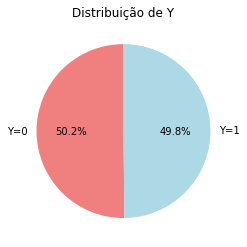

In [23]:
plt.pie(percentages, labels=['Y=0', 'Y=1'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribuição de Y')
plt.show()

Este gráfico representa a distribuição de Y, sendo que este apenas se caracteriza por 0 ou 1. Tendo em conta que metade das amostras do dataset são com Y==0 e a outra Y==1 o gráfico plt.pie fica com 50.2% para Y==0 e 49.8% para Y==1.

In [24]:
alvos_por_miRNA = dataset.groupby('miRNA_ID')['Target_ID'].nunique()
top_n = 20
top_miRNAs = alvos_por_miRNA.nlargest(top_n)

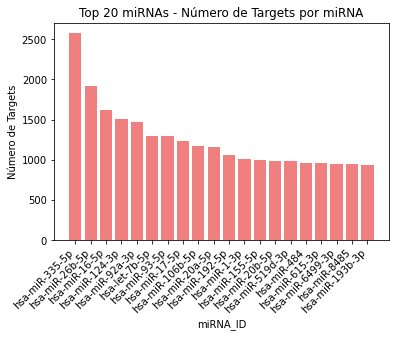

In [25]:
plt.bar(top_miRNAs.index, top_miRNAs.values, color='lightcoral')

plt.xlabel('miRNA_ID')
plt.ylabel('Número de Targets')
plt.title(f'Top {top_n} miRNAs - Número de Targets por miRNA')
plt.xticks(rotation=45, ha='right')
plt.show()

Utilizando um gráfico de barras e selecionando apenas os top 20 miRNA que têm mais interações com mais targets, representou-se o número de alvos por miRNA.

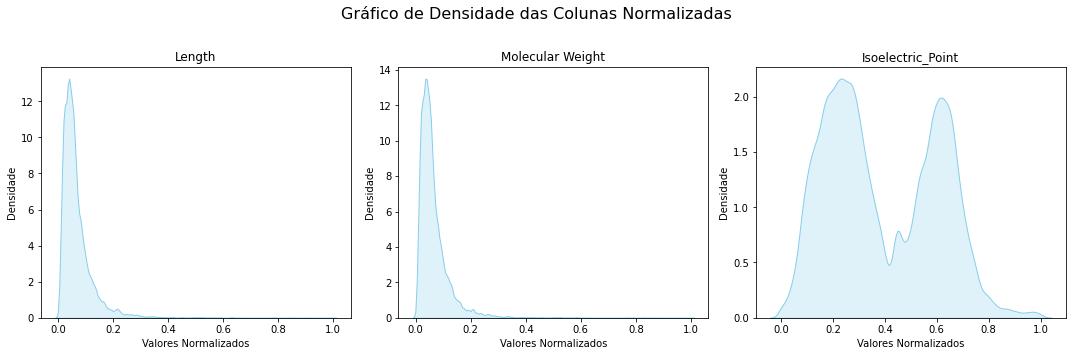

In [40]:
import seaborn as sns

df_normalized = dataset.iloc[:, 6:9]

columns_normalized = df_normalized.columns

fig, axes = plt.subplots(1, len(columns_normalized), figsize=(15, 5))
fig.suptitle('Gráfico de Densidade das Colunas Normalizadas', fontsize=16)

for i, col in enumerate(columns_normalized):
    sns.kdeplot(df_normalized[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores Normalizados')
    axes[i].set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

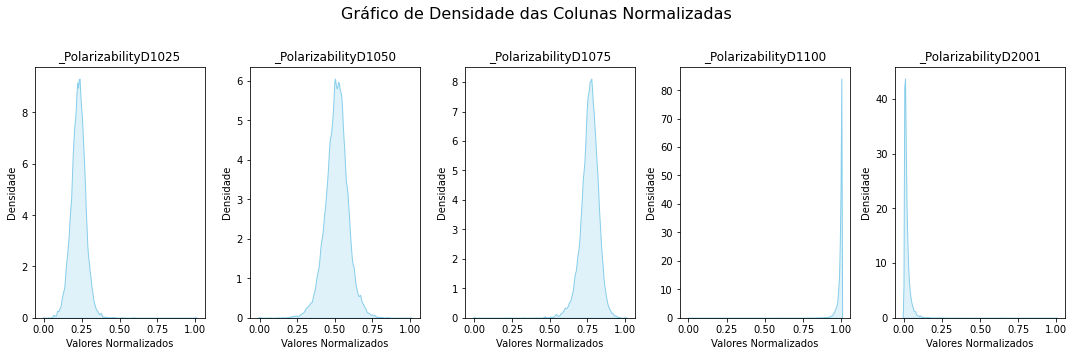

In [42]:
import seaborn as sns

df_normalized = dataset.iloc[:, 10:15]

columns_normalized = df_normalized.columns

fig, axes = plt.subplots(1, len(columns_normalized), figsize=(15, 5))
fig.suptitle('Gráfico de Densidade das Colunas Normalizadas', fontsize=16)

for i, col in enumerate(columns_normalized):
    sns.kdeplot(df_normalized[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores Normalizados')
    axes[i].set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

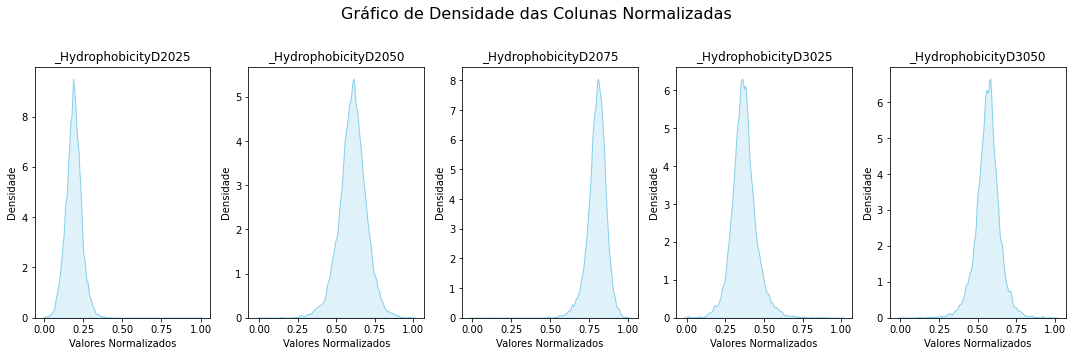

In [46]:
import seaborn as sns

df_normalized = dataset.iloc[:, 90:95]

columns_normalized = df_normalized.columns

fig, axes = plt.subplots(1, len(columns_normalized), figsize=(15, 5))
fig.suptitle('Gráfico de Densidade das Colunas Normalizadas', fontsize=16)

for i, col in enumerate(columns_normalized):
    sns.kdeplot(df_normalized[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Valores Normalizados')
    axes[i].set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

## Secção 2 - Análise não supervisionada

##### 2.1 - Reportar/analisar os resultados obtidos para as técnicas de redução de dimensionalidade e visualização de dados

###### PCA

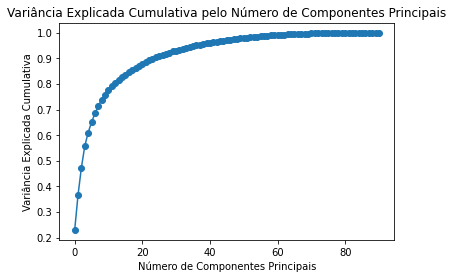

In [54]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit(dataset.iloc[:, 6:])

cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Variância Explicada Cumulativa pelo Número de Componentes Principais')
plt.show()

In [56]:
import numpy as np

threshold_variance = 0.95

num_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1

print(f'Número de Componentes para {threshold_variance * 100}% de Variância Explicada: {num_components}')

Número de Componentes para 95.0% de Variância Explicada: 37


In [60]:
pca = PCA(n_components=37)
X_pca = pca.fit_transform(dataset.iloc[:, 6:])

In [67]:
data_pca = {f'PCA_Component_{i+1}': X_pca[:, i] for i in range(pca.n_components)}
df_pca_components = pd.DataFrame(data_pca)

df_pca_components

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7,PCA_Component_8,PCA_Component_9,PCA_Component_10,...,PCA_Component_28,PCA_Component_29,PCA_Component_30,PCA_Component_31,PCA_Component_32,PCA_Component_33,PCA_Component_34,PCA_Component_35,PCA_Component_36,PCA_Component_37
0,0.011726,0.022361,-0.207093,0.371248,0.210899,0.055159,0.106965,0.105477,0.238473,-0.078606,...,0.038455,0.038041,-0.118981,-0.023519,0.009339,-0.040827,-0.077968,0.154294,-0.108229,-0.060968
1,0.004324,0.062130,-0.363205,0.327428,0.223411,0.236548,-0.084401,0.042804,0.027841,-0.274741,...,0.110154,0.205381,0.002563,0.120567,-0.073741,-0.097299,-0.054323,-0.025140,-0.116122,0.009763
2,0.011726,0.022361,-0.207093,0.371248,0.210899,0.055159,0.106965,0.105477,0.238473,-0.078606,...,0.038455,0.038041,-0.118981,-0.023519,0.009339,-0.040827,-0.077968,0.154294,-0.108229,-0.060968
3,0.004324,0.062130,-0.363205,0.327428,0.223411,0.236548,-0.084401,0.042804,0.027841,-0.274741,...,0.110154,0.205381,0.002563,0.120567,-0.073741,-0.097299,-0.054323,-0.025140,-0.116122,0.009763
4,-0.586751,-0.053008,0.079690,0.279123,-0.114748,0.034360,0.064705,0.152108,-0.164946,-0.145673,...,-0.039570,-0.100035,0.005147,-0.048580,0.061656,-0.044511,0.017901,-0.053609,-0.007733,0.030184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795163,-0.372171,0.136264,0.376712,0.035836,-0.038717,0.195706,0.075930,-0.011953,0.004201,0.134162,...,0.003989,-0.017090,-0.010118,0.072532,0.063604,-0.079396,0.049892,-0.030989,0.068141,-0.081523
795164,0.246537,0.106215,-0.227044,0.104805,0.129191,0.097458,-0.086404,0.140081,-0.001875,0.122741,...,0.014860,-0.042380,-0.014455,0.012079,-0.045441,0.050411,0.009597,-0.087420,0.028724,-0.029438
795165,-0.131947,-0.130067,-0.020087,0.048973,-0.154712,-0.041643,-0.046193,0.010842,0.030845,0.015439,...,0.010155,0.019949,-0.007939,-0.032728,-0.012410,-0.006980,0.031094,-0.013856,0.004907,-0.005221
795166,-0.141899,-0.139539,0.269027,0.033562,-0.120959,-0.005460,-0.032451,-0.034334,-0.070193,-0.040688,...,0.008043,-0.005400,-0.018707,-0.009803,-0.004880,0.001246,-0.007590,-0.015341,-0.006506,-0.006006


In [103]:
df_pca_components.to_csv('df_pca_components.csv')

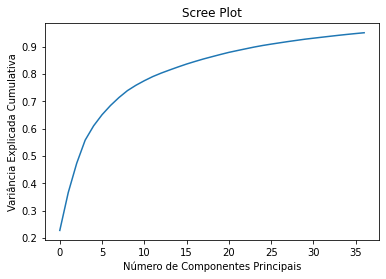

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Scree Plot')
plt.show()

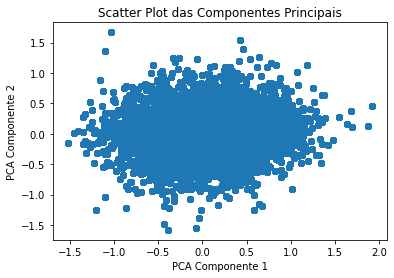

In [70]:
import matplotlib.pyplot as plt

plt.scatter(df_pca_components['PCA_Component_1'], df_pca_components['PCA_Component_2'], alpha=0.5)
plt.title('Scatter Plot das Componentes Principais')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.show()

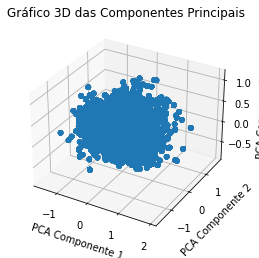

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_components['PCA_Component_1'], df_pca_components['PCA_Component_2'], df_pca_components['PCA_Component_3'], alpha=0.5)
ax.set_xlabel('PCA Componente 1')
ax.set_ylabel('PCA Componente 2')
ax.set_zlabel('PCA Componente 3')
plt.title('Gráfico 3D das Componentes Principais')
plt.show()

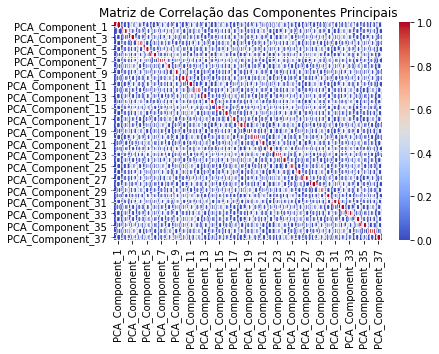

In [76]:
import seaborn as sns

correlation_matrix = df_pca_components.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Componentes Principais')
plt.show()

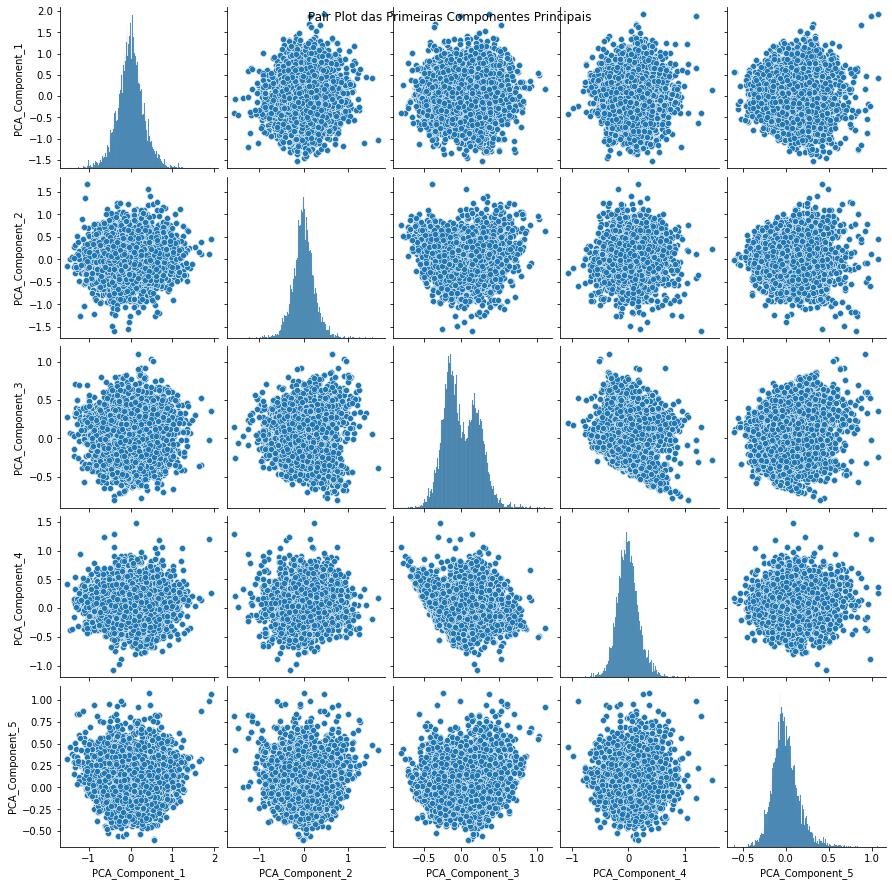

In [77]:
sns.pairplot(df_pca_components.iloc[:, :5])
plt.suptitle('Pair Plot das Primeiras Componentes Principais')
plt.show()

##### 2.2 - Reportar/analisar os resultados obtidos a partir dos algoritmos de clustering

###### Dendrograma

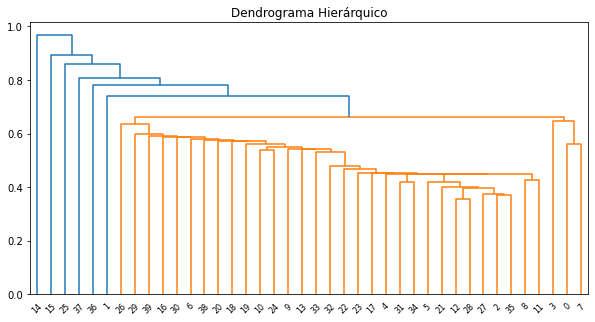

In [84]:
X_pca = dataset.iloc[:, 6:]

X_sampled = X_pca.sample(frac=0.00005, random_state=42)

Z_fast = linkage(X_sampled, method='single')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(Z_fast)
plt.title('Dendrograma Hierárquico')
plt.show()

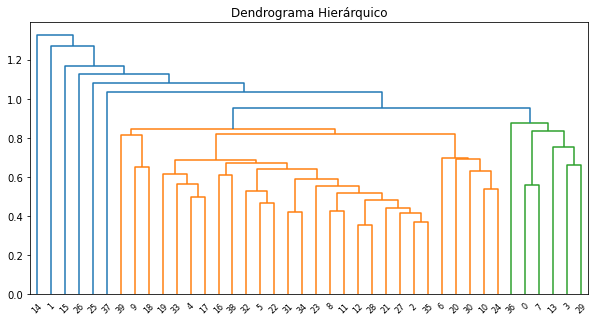

In [83]:
X_pca = dataset.iloc[:, 6:]

X_sampled = X_pca.sample(frac=0.00005, random_state=42)

Z_fast = linkage(X_sampled, method='average')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(Z_fast)
plt.title('Dendrograma Hierárquico')
plt.show()

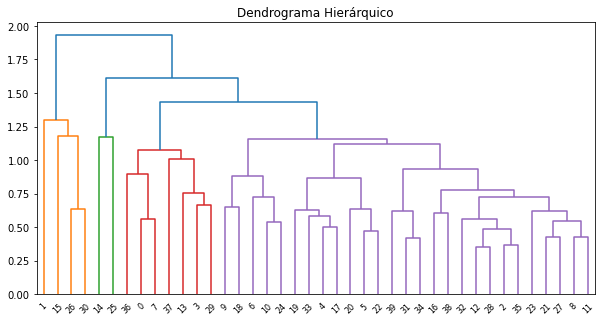

In [81]:
from fastcluster import linkage
from scipy.cluster import hierarchy

X = dataset.iloc[:, 6:]

X_sampled = X.sample(frac=0.00005, random_state=42)

Z_fast = linkage(X_sampled, method='complete')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(Z_fast)
plt.title('Dendrograma Hierárquico')
plt.show()

### 3 - Aprendizagem máquina

##### Modelos ML com os dados originais

In [79]:
import pandas as pd

dataset = pd.read_csv('final_dataset_after_preprocessing.csv', index_col=0)
df_pca_components = pd.read_csv('df_pca_components.csv', index_col=0)

In [80]:
import ast

dataset['miRNA_embeddings'] = [ast.literal_eval(embedding_str) for embedding_str in dataset['miRNA_embeddings']]

In [81]:
import numpy as np

dataset['miRNA_embeddings'] = dataset['miRNA_embeddings'].apply(np.array)

In [82]:
X_embeddings = np.vstack(dataset['miRNA_embeddings'].to_numpy())

In [83]:
X_embeddings

array([[2, 1, 2, ..., 0, 0, 0],
       [2, 1, 2, ..., 0, 0, 0],
       [2, 1, 2, ..., 0, 0, 0],
       ...,
       [1, 4, 3, ..., 0, 0, 0],
       [2, 3, 1, ..., 0, 0, 0],
       [2, 1, 3, ..., 0, 0, 0]])

In [84]:
X_descriptors = dataset.iloc[:, 6:-1].values

In [85]:
X_descriptors

array([[0.02188034, 0.01943271, 0.30628227, ..., 0.34369592, 0.52588884,
        0.79269782],
       [0.01458689, 0.01234626, 0.1495842 , ..., 0.29814586, 0.63477794,
        0.77328731],
       [0.02188034, 0.01943271, 0.30628227, ..., 0.34369592, 0.52588884,
        0.79269782],
       ...,
       [0.12786325, 0.12390017, 0.42354307, ..., 0.41654821, 0.58587023,
        0.77841211],
       [0.07099715, 0.07234695, 0.66107212, ..., 0.40156057, 0.58760009,
        0.75735528],
       [0.02074074, 0.02092822, 0.63142455, ..., 0.33071693, 0.43446866,
        0.75904142]])

In [86]:
Y_values = np.vstack(dataset['Y'].to_numpy())

In [87]:
Y_values

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [88]:
X_combined = np.concatenate((X_embeddings, X_descriptors), axis=1)

In [89]:
X_Y_combined = np.concatenate((X_combined, Y_values), axis=1)

In [90]:
X_Y_combined

array([[2.        , 1.        , 2.        , ..., 0.52588884, 0.79269782,
        1.        ],
       [2.        , 1.        , 2.        , ..., 0.63477794, 0.77328731,
        1.        ],
       [2.        , 1.        , 2.        , ..., 0.52588884, 0.79269782,
        1.        ],
       ...,
       [1.        , 4.        , 3.        , ..., 0.58587023, 0.77841211,
        0.        ],
       [2.        , 3.        , 1.        , ..., 0.58760009, 0.75735528,
        0.        ],
       [2.        , 1.        , 3.        , ..., 0.43446866, 0.75904142,
        0.        ]])

In [70]:
np.save('array_ML_original.npy', X_Y_combined)

In [91]:
df = pd.DataFrame(X_Y_combined)

In [92]:
df

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.600553,0.621747,0.852867,0.194619,0.592775,0.778013,0.343696,0.525889,0.792698,1.0
1,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.562101,0.654851,0.980991,0.202083,0.562012,0.773949,0.298146,0.634778,0.773287,1.0
2,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.600553,0.621747,0.852867,0.194619,0.592775,0.778013,0.343696,0.525889,0.792698,1.0
3,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.562101,0.654851,0.980991,0.202083,0.562012,0.773949,0.298146,0.634778,0.773287,1.0
4,2.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,4.0,3.0,...,0.391503,0.629826,0.992287,0.240752,0.660600,0.772654,0.314570,0.520267,0.783258,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795163,1.0,4.0,3.0,1.0,2.0,4.0,4.0,3.0,4.0,1.0,...,0.595360,0.568479,0.939304,0.211305,0.683300,0.864256,0.343758,0.414746,0.658192,0.0
795164,4.0,3.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0,...,0.639719,0.650329,1.000000,0.203217,0.476248,0.830359,0.313133,0.554576,0.712228,0.0
795165,1.0,4.0,3.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,...,0.543179,0.635350,0.992431,0.200064,0.608206,0.789231,0.416548,0.585870,0.778412,0.0
795166,2.0,3.0,1.0,1.0,4.0,3.0,4.0,3.0,4.0,2.0,...,0.516205,0.640355,0.991073,0.217850,0.634031,0.815128,0.401561,0.587600,0.757355,0.0


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

y = X_Y_combined[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_Y_combined[:, :-1], y, test_size=0.2, random_state=42)

In [53]:
len(y_test)

159034

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

Model: Gradient Boosting
Accuracy: 0.6157676974734962
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     79940
         1.0       0.62      0.60      0.61     79094

    accuracy                           0.62    159034
   macro avg       0.62      0.62      0.62    159034
weighted avg       0.62      0.62      0.62    159034



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

models = {
    'KNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

___Random Forest >> KNN >> Gradient Boosting >> Logistic Regression___

A _accuracy_ mede a proporção de instâncias corretamente classificadas em relação ao total.

##### Modelos ML com os dados de PCA

In [97]:
X_descriptors = df_pca_components.values

In [98]:
X_descriptors

array([[ 0.01172559,  0.02236103, -0.20709252, ...,  0.15429369,
        -0.10822942, -0.0609678 ],
       [ 0.00432376,  0.06212972, -0.36320461, ..., -0.02514025,
        -0.11612189,  0.0097634 ],
       [ 0.01172559,  0.02236103, -0.20709252, ...,  0.15429369,
        -0.10822942, -0.0609678 ],
       ...,
       [-0.13194748, -0.13006716, -0.02008699, ..., -0.01385609,
         0.00490676, -0.00522096],
       [-0.1418992 , -0.13953933,  0.26902725, ..., -0.01534115,
        -0.00650609, -0.00600609],
       [-0.15698987,  0.12928563,  0.36282183, ..., -0.02173883,
         0.10727476, -0.01473257]])

In [99]:
X_combined = np.concatenate((X_embeddings, X_descriptors), axis=1)

In [100]:
X_Y_combined = np.concatenate((X_combined, Y_values), axis=1)

In [101]:
X_Y_combined

array([[ 2.        ,  1.        ,  2.        , ..., -0.10822942,
        -0.0609678 ,  1.        ],
       [ 2.        ,  1.        ,  2.        , ..., -0.11612189,
         0.0097634 ,  1.        ],
       [ 2.        ,  1.        ,  2.        , ..., -0.10822942,
        -0.0609678 ,  1.        ],
       ...,
       [ 1.        ,  4.        ,  3.        , ...,  0.00490676,
        -0.00522096,  0.        ],
       [ 2.        ,  3.        ,  1.        , ..., -0.00650609,
        -0.00600609,  0.        ],
       [ 2.        ,  1.        ,  3.        , ...,  0.10727476,
        -0.01473257,  0.        ]])

In [78]:
np.save('array_ML_PCA.npy', X_Y_combined)

In [76]:
df = pd.DataFrame(X_Y_combined)

In [77]:
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.038041,-0.118981,-0.023519,0.009339,-0.040827,-0.077968,0.154294,-0.108229,-0.060968,1.0
1,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.205381,0.002563,0.120567,-0.073741,-0.097299,-0.054323,-0.025140,-0.116122,0.009763,1.0
2,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.038041,-0.118981,-0.023519,0.009339,-0.040827,-0.077968,0.154294,-0.108229,-0.060968,1.0
3,2.0,1.0,2.0,1.0,2.0,2.0,4.0,2.0,4.0,3.0,...,0.205381,0.002563,0.120567,-0.073741,-0.097299,-0.054323,-0.025140,-0.116122,0.009763,1.0
4,2.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,4.0,3.0,...,-0.100035,0.005147,-0.048580,0.061656,-0.044511,0.017901,-0.053609,-0.007733,0.030184,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795163,1.0,4.0,3.0,1.0,2.0,4.0,4.0,3.0,4.0,1.0,...,-0.017090,-0.010118,0.072532,0.063604,-0.079396,0.049892,-0.030989,0.068141,-0.081523,0.0
795164,4.0,3.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,4.0,...,-0.042380,-0.014455,0.012079,-0.045441,0.050411,0.009597,-0.087420,0.028724,-0.029438,0.0
795165,1.0,4.0,3.0,1.0,2.0,3.0,1.0,2.0,1.0,2.0,...,0.019949,-0.007939,-0.032728,-0.012410,-0.006980,0.031094,-0.013856,0.004907,-0.005221,0.0
795166,2.0,3.0,1.0,1.0,4.0,3.0,4.0,3.0,4.0,2.0,...,-0.005400,-0.018707,-0.009803,-0.004880,0.001246,-0.007590,-0.015341,-0.006506,-0.006006,0.0


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

y = X_Y_combined[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_Y_combined[:, :-1], y, test_size=0.2, random_state=42)

In [62]:
len(y_test)

159034

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

In [ ]:
models = {
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

models = {
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

Model: Gradient Boosting
Accuracy: 0.6172013531697624
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.63      0.62     79940
         1.0       0.62      0.60      0.61     79094

    accuracy                           0.62    159034
   macro avg       0.62      0.62      0.62    159034
weighted avg       0.62      0.62      0.62    159034



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

models = {
    'KNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

___Random Forest >> KNN >> Gradient Boosting >> Logistic Regression___